# Exercise: Scaling and learning rates

In this notebook, we'll train a neural network on a EEG dataset. The objective is to detect whether the eyes of the experimental subject are open or closed.  

First we do a couple of necessary imports and load the dataset. We also print the description.

In [1]:
import math
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
plt.style.use("seaborn-v0_8")

# fetch data from openml.org
from sklearn.datasets import fetch_openml
data = fetch_openml('eeg-eye-state', cache=True)
print(data.DESCR)

c:\Users\lauri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analyzing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

The features correspond to 14 EEG measurements from the headset, originally labeled AF3, F7, F3, FC5, T7, P, O1, O2, P8, T8, FC6, F4, F8, AF4, in that order.

Downloaded from openml.org.


Let's start examining the dataset. First question: how large is the dataset.

In [2]:
print("number of samples: {}".format(len(data["data"])))

number of samples: 14980


Next, we split off a training set and a validation set. Because there is not much data and we just want to compare different algorithms, we don't define a test set.

In [3]:
X,y=sklearn.utils.shuffle(np.array(data["data"]), data["target"].astype('int')-1) # let's make sure the data is in random order
train_size=10000
X_train,X_val=X[:train_size],X[train_size:]
y_train,y_val=y[:train_size],y[train_size:]
X_train.shape,X_val.shape

((10000, 14), (4980, 14))

## Scaling

We continue inspecting the data. As I already know that the data takes continuous values with the values mainly in the same range, we can do a boxplot of the features.

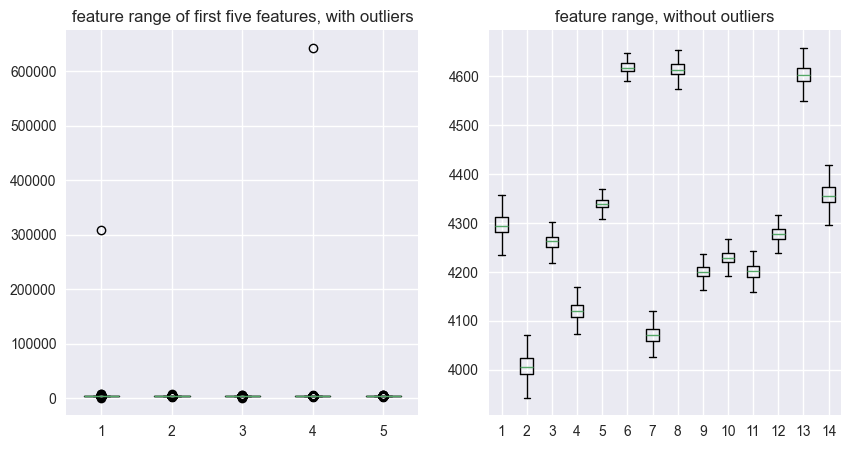

In [4]:
_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].boxplot(X_train[:,:5])
axs[0].set_title("feature range of first five features, with outliers")
axs[1].boxplot(X_train,showfliers=False)
axs[1].set_title("feature range, without outliers")
plt.show()

We observe: there are substantial outliers and the data takes quite large values.

### Task: Train NN
* Use tensorflow, to define a ReLU-neural network for binary classification with two hidden layers, the first with 50 neurons, the second with 10 neurons. You can either have a single output neuron with logistic activation ('sigmoid') or two output neurons with softmax activation.
* Take <code>tf.keras.losses.SparseCategoricalCrossentropy</code> as loss.
* Train the neural network for 30 epochs and pass along the validation set <code>validation_data=(X_val,y_val)</code> to <code>fit</code>. Otherwise use the default parameters.

You should see terrible performance. (If this exercise seems challenging to you, have a look in [tfintro](https://colab.research.google.com/github/henningbruhn/math_of_ml_course/blob/main/neural_networks/tfintro.ipynb).)



Epoch 1/30


313/313 [==============================] - 5s 7ms/step - loss: 20.7785 - accuracy: 0.5009 - val_loss: 16.2472 - val_accuracy: 0.4498
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 9.3865 - accuracy: 0.5053 - val_loss: 7.7996 - val_accuracy: 0.4498
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 3.3100 - accuracy: 0.5164 - val_loss: 0.6895 - val_accuracy: 0.5502
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6879 - accuracy: 0.5518 - val_loss: 0.6881 - val_accuracy: 0.5502
Epoch 5/30
313/313 [==============================] - 3s 8ms/step - loss: 0.6876 - accuracy: 0.5518 - val_loss: 0.6881 - val_accuracy: 0.5502
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6876 - accuracy: 0.5518 - val_loss: 0.6881 - val_accuracy: 0.5502
Epoch 7/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6876 - accuracy: 0.5518 - val_loss: 0.6881 - val_accuracy: 0.5

Text(0, 0.5, 'validation accuracy [%]')

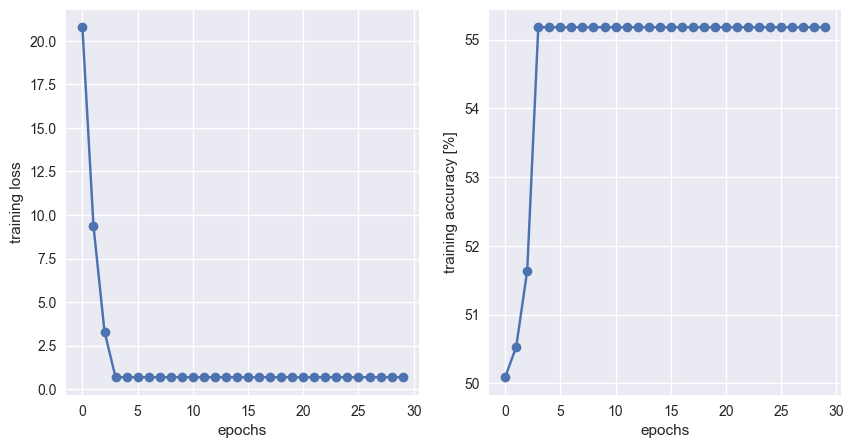

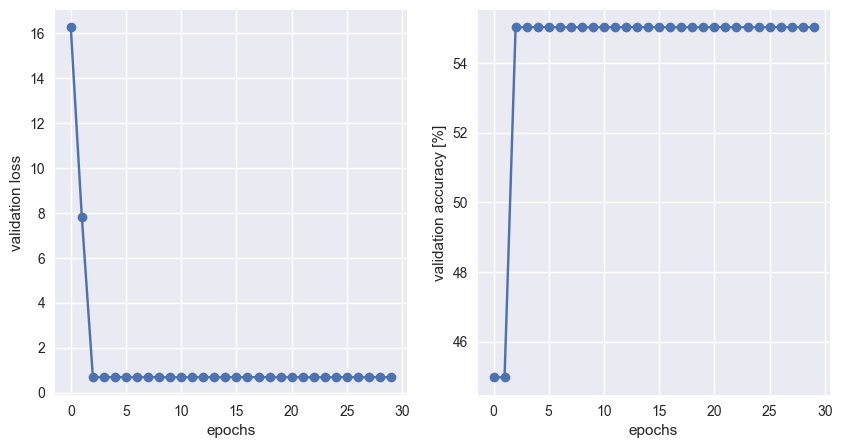

In [5]:
### insert your code here ###
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(14,)))
model1.add(tf.keras.layers.Dense(50, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='relu'))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model1.compile(loss = loss_fn, metrics = ['accuracy'])
history = model1.fit(X_train, y_train, epochs = 30, validation_data=(X_val,y_val))

_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(history.epoch,history.history['loss'],'o-')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('training loss')

axs[1].plot(history.epoch,np.array(history.history['accuracy'])*100,'o-')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('training accuracy [%]')

_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(history.epoch,history.history['val_loss'],'o-')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('validation loss')

axs[1].plot(history.epoch,np.array(history.history['val_accuracy'])*100,'o-')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('validation accuracy [%]')


What happened? Obviously, the model performs not well, not at all. The reason: When the weights are initialised at the beginning of training it is expected that the data has values more or less in the range $[-1,1]$. Our data, however, takes much larger values. Because of that the neural network starts training in a sort of off-balance state and then takes a very long while moving away from there (if that happens at all). We'll rectify that by scaling the data. Here, because it's simple we use <code>sklearn.preprocessing.StandardScaler</code>, a method of *scikit-learn*. There's also a tensorflow way of doing this, which you'll see in the solution.

What does <code>StandardScaler</code> do? First, it ensures that the data has mean 0 by substracting the mean from every sample. Then the data is multiplied by a factor so that the variance becomes 1. Thus, larger values than 1 are possible, but mostly the values range from -1 to 1. Let's have a look at the boxplots again.

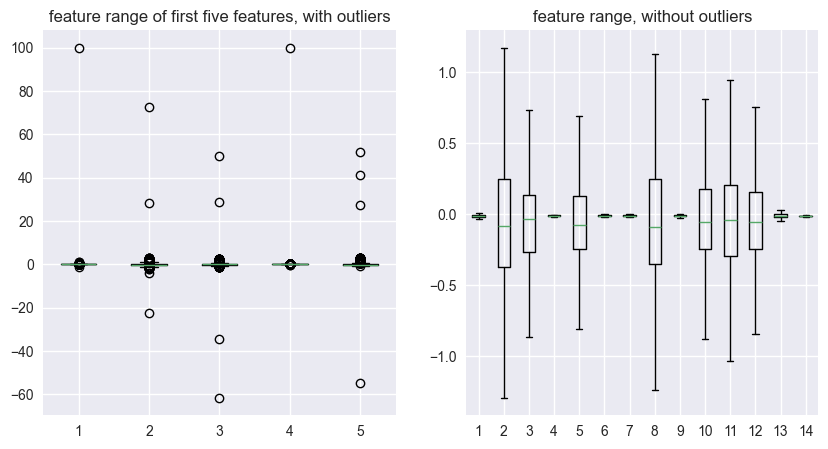

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # we need to fit, to learn the mean and the variance
X_val_scaled=scaler.transform(X_val) # the validation/test set is only transformed, not fit

### plotting
_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].boxplot(X_train_scaled[:,:5])
axs[0].set_title("feature range of first five features, with outliers")
axs[1].boxplot(X_train_scaled,showfliers=False)
axs[1].set_title("feature range, without outliers")
plt.show()

Note that the line in the boxes shows the *median* not the *mean* (which should be at 0). There are still substantial outliers but as most of the values hail from $[-1,1]$, training should hopefully work better now. Let's try out!

### Task: Train with scaling
* Repeat the steps of the previous task, use <code>X_train_scaled</code> and <code>X_val_scaled</code>, however.

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 0.6644 - accuracy: 0.5882 - val_loss: 0.6492 - val_accuracy: 0.6034
Epoch 2/30
313/313 [==============================] - 3s 8ms/step - loss: 0.6378 - accuracy: 0.6264 - val_loss: 0.6270 - val_accuracy: 0.6359
Epoch 3/30
313/313 [==============================] - 5s 14ms/step - loss: 0.6256 - accuracy: 0.6584 - val_loss: 0.6055 - val_accuracy: 0.6683
Epoch 4/30
313/313 [==============================] - 5s 14ms/step - loss: 0.6044 - accuracy: 0.6831 - val_loss: 0.5932 - val_accuracy: 0.6739
Epoch 5/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5825 - accuracy: 0.6977 - val_loss: 0.5728 - val_accuracy: 0.6853
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5658 - accuracy: 0.7100 - val_loss: 0.5629 - val_accuracy: 0.6988
Epoch 7/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5494 - accuracy: 0.7201 - val_loss: 0.5514 - val_accuracy: 0.7054
E

Text(0, 0.5, 'validation accuracy [%]')

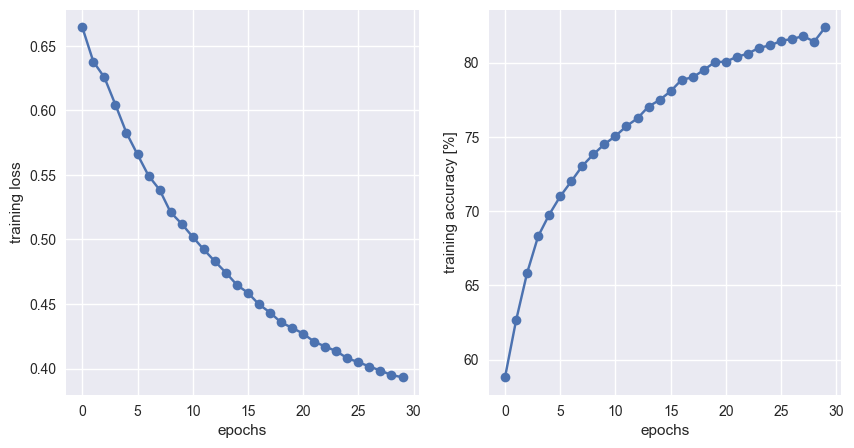

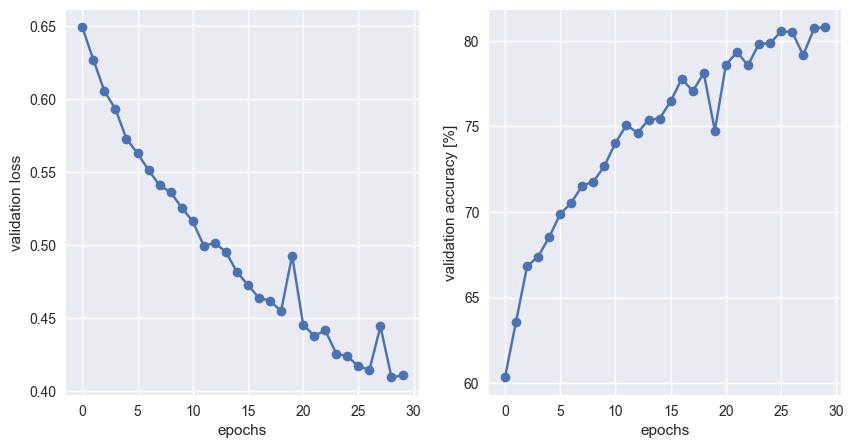

In [7]:
### insert your code here ###
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(14,)))
model2.add(tf.keras.layers.Dense(50, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='softmax'))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model2.compile(loss = loss_fn, metrics = ['accuracy'])
history = model2.fit(X_train_scaled, y_train, epochs = 30, validation_data=(X_val_scaled,y_val))

_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(history.epoch,history.history['loss'],'o-')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('training loss')

axs[1].plot(history.epoch,np.array(history.history['accuracy'])*100,'o-')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('training accuracy [%]')

_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(history.epoch,history.history['val_loss'],'o-')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('validation loss')

axs[1].plot(history.epoch,np.array(history.history['val_accuracy'])*100,'o-')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('validation accuracy [%]')



Much better!

## Learning rates

Next, we'll see how learning rates can be set. So far, we had always used the default values for the optimiser. This needs to change now. The optimiser is specified when calling <code>compile</code> on a model. If we just want to choose between different optimisers without setting any optimiser specific parameters, we can prescribe the optimiser by passing a string:

<code>mode.compile(loss=loss_fn, metrics=['accuracy'],optimizer="SGD")  # stochastic gradient descent</code>

or

<code>mode.compile(loss=loss_fn, metrics=['accuracy'],optimizer="Adam")  # Adam optimiser</code>

As we want set a learning rate, however, we actually need to instantiate an optimiser object:

<code>my_SGD=tf.keras.optimizers.SGD(learning_rate=0.42)
mode.compile(loss=loss_fn, metrics=['accuracy'],optimizer=my_SGD)</code>

### Task: different learning rates
* For each of the learning rates $[0.01,0.1,1]$ train a neural network of the same type as above (ie, two hidden layers with 50 and 10 neurons etc), again for 30 epochs each.
* Use the <code>history</code> object returned by <code>fit</code> to plot the three losses (for the different learning rates) in the same plot. Which learning rate works best? For plotting see [plt_intro](https://colab.research.google.com/github/henningbruhn/math_of_ml_course/blob/main/python_intro/plt_intro.ipynb).
* Plot also the validation loss. (You find it in <code>history.history["val_loss"]</code>.)

By the way, if all the output of <code>fit</code> annoys you: You can switch it off by setting <code>verbose=0</code>.

Epoch 1/30
313/313 [==============================] - 6s 12ms/step - loss: nan - accuracy: 0.5488 - val_loss: nan - val_accuracy: 0.5502
Epoch 2/30
313/313 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 3/30
313/313 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 6/30
313/313 [==============================] - 4s 14ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 7/30
313/313 [==============================] - 4s 14ms/step - loss: nan - accuracy: 0.5517 - val_loss: nan - val_accuracy: 0.5502
Epoch 8/30
313/313 [=====================

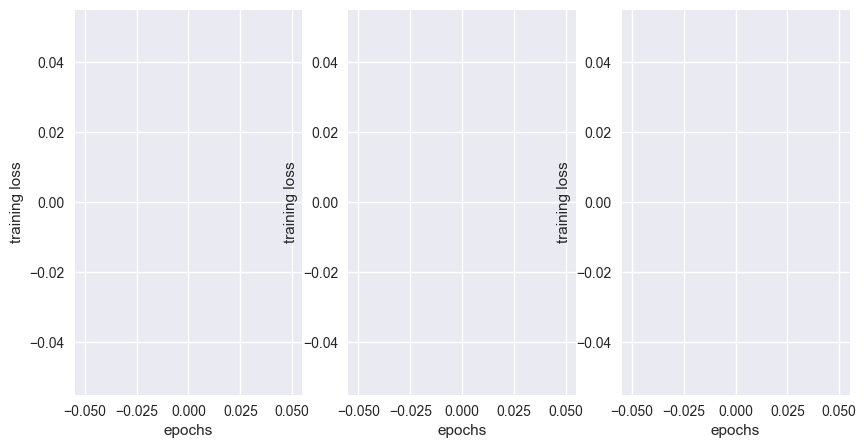

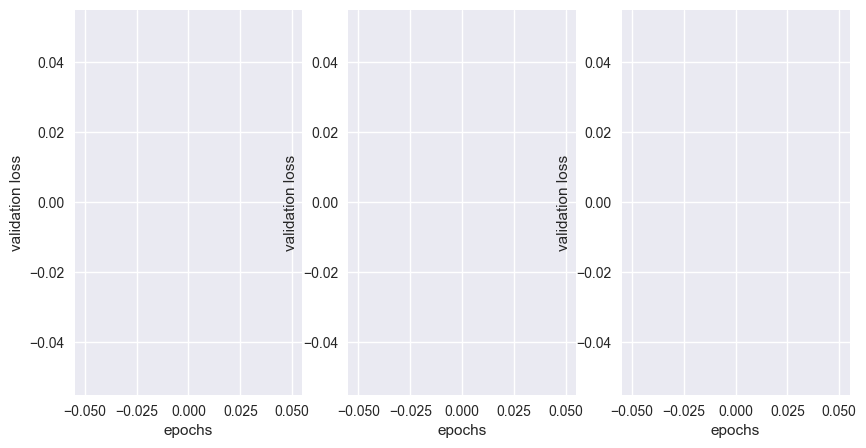

In [8]:
### insert your code here ###
learning_rates = [0.01,0.1,1]
losses = []
val_losses = []
for lr in learning_rates:
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Flatten(input_shape=(14,)))
    model1.add(tf.keras.layers.Dense(50, activation='relu'))
    model1.add(tf.keras.layers.Dense(10, activation='relu'))
    model1.add(tf.keras.layers.Dense(2, activation='softmax'))

    my_SGD=tf.keras.optimizers.SGD(learning_rate=lr)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    model1.compile(loss = loss_fn, metrics = ['accuracy'], optimizer=my_SGD)
    history = model1.fit(X_train, y_train, epochs = 30, validation_data=(X_val,y_val))

    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

_,axs=plt.subplots(1,3,figsize=(10,5))
for i in range(3):
    axs[i].plot(range(30),losses[i],'o-')
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('training loss')

_,axs=plt.subplots(1,3,figsize=(10,5))
for i in range(3):
    axs[i].plot(range(30),val_losses[i],'o-')
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel('validation loss')



In [9]:
losses

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]]